In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
#데이터 경로 설정
# path_dir = "C:/Users/Administrator/Desktop/nexen_csv"
path_dir = "C:/Users/dwku/Desktop/nexen"
file_list = os.listdir(path_dir)
file_list.sort
file_list
len(file_list)
file_list

['20180817.csv']

In [4]:
# 데이터 파일 읽기 및 병합
i = 0
df_raw = pd.read_csv(path_dir + "/" + file_list[i], parse_dates=["History_TransTime"])

df = df_raw
print(df.shape)

(2212836, 27)


In [5]:
type(df[["History_SEQ"]])

pandas.core.frame.DataFrame

In [6]:
df["time_series"] = df.index.values

In [7]:
df0 = df[["time_series", "History_TransTime", "History_AreaName", "History_MachineName", "History_SensorName", "History_ItemName", "History_Value"]]

In [8]:
df0.head()

,time_series,History_TransTime,History_AreaName,History_MachineName,History_SensorName,History_ItemName,History_Value
0,0,2018-08-17 20:33:43.680,R-Calender,Dryer Drums Drive,Motor Body,[11]Z-Axis_RMS,0.210
1,1,2018-08-17 20:33:43.680,R-Calender,Dryer Drums Drive,Motor Body,[11]Temp,46.750
2,2,2018-08-17 20:33:43.680,R-Calender,Dryer Drums Drive,Motor Body,[11]X-Axis RMS,0.659
3,3,2018-08-17 20:33:43.680,R-Calender,Dryer Drums Drive,Motor Body,[11]Z-Axis Peak Frequency,75.600
4,4,2018-08-17 20:33:43.680,R-Calender,Dryer Drums Drive,Motor Body,[11]X-Axis Peak Frequency,19.500


In [200]:
df0.groupby(["History_MachineName", "History_SensorName", "History_ItemName"])[["History_Value"]].mean()

History_Value
History_MachineName    History_SensorName   History_ItemName                                                
Cooling Drums Drive    Motor                [11]Temperature (°C)                                   35.913575
                                            [11]X-Axis Peak Velocity Component Frequency (Hz)      64.050043
                                            [11]X-Axis RMS Velocity (mm/sec)                        0.791875
                                            [11]Z-Axis Peak Velocity Component Frequency (Hz)      58.399530
                                            [11]Z-Axis RMS Velocity (mm/sec)                        0.790624
                       Reducer Input Shaft  [12]Temperature (°C)                                   35.707360
                                            [12]X-Axis Peak Velocity Component Frequency (Hz)      40.856852
                                            [12]X-Axis RMS Velocity (mm/sec)                        0.328364
                                            [12]Z-Axis Peak Velocity Component Frequency (Hz)     118.150556
                                            [12]Z-Axis RMS Velocity (mm/sec)                        0.547210
                       Reducer Middle Shaft [13]Temperature (°C)                                   35.140440
                                            [13]X-Axis Peak Velocity Component Frequency (Hz)     104.769601
                                            [13]X-Axis RMS Velocity (mm/sec)                        0.270390
                                            [13]Z-Axis Peak Velocity Component Frequency (Hz)      59.213376
                                            [13]Z-Axis RMS Velocity (mm/sec)                        0.459083
                       Reducer Output Shaft [14]Temperature (°C)                                   36.799583
                                            [14]X-Axis Peak Velocity Component Frequency (Hz)      31.267493
                                            [14]X-Axis RMS Velocity (mm/sec)                        0.275370
                                            [14]Z-Axis Peak Velocity Component Frequency (Hz)      50.656239
                                            [14]Z-Axis RMS Velocity (mm/sec)                        0.493812
Dryer Drums Drive      Motor Body           [11]Temp                                               39.880182
                                            [11]X-Axis Peak Frequency                              19.357324
                                            [11]X-Axis RMS                                          0.317379
                                            [11]Z-Axis Peak Frequency                              14.942819
                                            [11]Z-Axis_RMS                                          0.170624
                       Motor Reducer        [12]Temp                                               39.050639
                                            [12]X-Axis Peak Frequency                              25.123402
                                            [12]X-Axis RMS                                          0.281112
                                            [12]Z-Axis Peak Frequency                             117.422662
                                            [12]Z-Axis RMS                                          0.251849
...                                                                                                      ...
Wind Up #1             Reducer Output Shaft [17]Temperature (°C)                                   33.451440
                                            [17]X-Axis Peak Velocity Component Frequency (Hz)      13.845370
                                            [17]X-Axis RMS Velocity (mm/sec)                        0.302452
                                            [17]Z-Axis Peak Velocity Component Frequency (Hz)      13.297094
                                            [17]Z-Axis RMS Vel

In [204]:
df0["Position"] = df0["History_SensorName"]

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [205]:
# df0.groupby(["History_MachineName", "History_SensorName", "History_ItemName"])
pd.pivot_table(data = df0, index = 'History_MachineName')

,History_Value,time_series
History_MachineName,,
Cooling Drums Drive,33.744069,1.105877e+06
Dryer Drums Drive,20.689962,1.105813e+06
Extruder,51.978827,1.106324e+06
Let Off Drive,17.567319,1.106729e+06
Main Roll DS,17.419971,1.107331e+06
Main Roll OS,18.862827,1.105870e+06
Main Roll Reducer #1,19.635113,1.106423e+06
Main Roll Reducer #2,24.095215,1.106569e+06
Main Roll Reducer #3,32.008611,1.106455e+06


In [206]:
History_MachineName_array = pd.pivot_table(data = df0, index = 'History_MachineName').index.values
History_MachineName_array

array(['Cooling Drums Drive', 'Dryer Drums Drive', 'Extruder',
       'Let Off Drive', 'Main Roll DS', 'Main Roll OS',
       'Main Roll Reducer #1', 'Main Roll Reducer #2',
       'Main Roll Reducer #3', 'Main Roll Reducer #4', 'Open mill',
       'Pre-Tension Compensator Drive', 'Wind Up #1', 'Wind Up #2',
       'Wind Up Vacuum Cleaner'], dtype=object)

In [207]:
History_MachineName = df0[df0["History_MachineName"] == History_MachineName_array[0]]

In [208]:
History_MachineName.head()

,time_series,History_TransTime,History_AreaName,History_MachineName,History_SensorName,History_ItemName,History_Value,Position
1197,1197,2018-08-17 00:00:06.807,R-Calender,Cooling Drums Drive,Motor,[11]Z-Axis RMS Velocity (mm/sec),1.103,Motor
1198,1198,2018-08-17 00:00:06.807,R-Calender,Cooling Drums Drive,Motor,[11]Z-Axis Peak Velocity Component Frequency (Hz),19.500,Motor
1199,1199,2018-08-17 00:00:06.807,R-Calender,Cooling Drums Drive,Motor,[11]X-Axis RMS Velocity (mm/sec),1.220,Motor
1200,1200,2018-08-17 00:00:06.807,R-Calender,Cooling Drums Drive,Motor,[11]X-Axis Peak Velocity Component Frequency (Hz),19.500,Motor
1201,1201,2018-08-17 00:00:06.807,R-Calender,Cooling Drums Drive,Motor,[11]Temperature (°C),37.360,Motor


In [209]:
History_ItemName_array = pd.pivot_table(data = History_MachineName, index = 'History_ItemName').index.values
History_ItemName_array

array(['[11]Temperature (°C)',
       '[11]X-Axis Peak Velocity Component Frequency (Hz)',
       '[11]X-Axis RMS Velocity (mm/sec)',
       '[11]Z-Axis Peak Velocity Component Frequency (Hz)',
       '[11]Z-Axis RMS Velocity (mm/sec)', '[12]Temperature (°C)',
       '[12]X-Axis Peak Velocity Component Frequency (Hz)',
       '[12]X-Axis RMS Velocity (mm/sec)',
       '[12]Z-Axis Peak Velocity Component Frequency (Hz)',
       '[12]Z-Axis RMS Velocity (mm/sec)', '[13]Temperature (°C)',
       '[13]X-Axis Peak Velocity Component Frequency (Hz)',
       '[13]X-Axis RMS Velocity (mm/sec)',
       '[13]Z-Axis Peak Velocity Component Frequency (Hz)',
       '[13]Z-Axis RMS Velocity (mm/sec)', '[14]Temperature (°C)',
       '[14]X-Axis Peak Velocity Component Frequency (Hz)',
       '[14]X-Axis RMS Velocity (mm/sec)',
       '[14]Z-Axis Peak Velocity Component Frequency (Hz)',
       '[14]Z-Axis RMS Velocity (mm/sec)'], dtype=object)

In [210]:
History_MachineName["Sensor_ID"] =History_MachineName["History_ItemName"].str.split("]", n=1, expand=True)[0]
History_MachineName["Sensor_ID"] =History_MachineName["Sensor_ID"].str.split("[", n=1, expand=True)[1]
History_MachineName["History_ItemName_re"] =History_MachineName["History_ItemName"].str.split("]", n=1, expand=True)[1]
History_MachineName[["History_ItemName", "Sensor_ID", "History_ItemName_re"]].head()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,History_ItemName,Sensor_ID,History_ItemName_re
1197,[11]Z-Axis RMS Velocity (mm/sec),11,Z-Axis RMS Velocity (mm/sec)
1198,[11]Z-Axis Peak Velocity Component Frequency (Hz),11,Z-Axis Peak Velocity Component Frequency (Hz)
1199,[11]X-Axis RMS Velocity (mm/sec),11,X-Axis RMS Velocity (mm/sec)
1200,[11]X-Axis Peak Velocity Component Frequency (Hz),11,X-Axis Peak Velocity Component Frequency (Hz)
1201,[11]Temperature (°C),11,Temperature (°C)


In [211]:
History_ItemName_array = pd.pivot_table(data = History_MachineName, index = 'History_ItemName_re').index.values
History_ItemName_array.sort()
History_ItemName_array

array(['Temperature (°C)',
       'X-Axis Peak Velocity Component Frequency (Hz)',
       'X-Axis RMS Velocity (mm/sec)',
       'Z-Axis Peak Velocity Component Frequency (Hz)',
       'Z-Axis RMS Velocity (mm/sec)'], dtype=object)

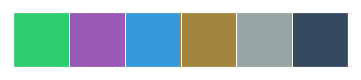

In [212]:
flatui = ["#2ecc71", "#9b59b6", "#3498db", "#a2853c", "#95a5a6", "#34495e"]
sns.palplot(sns.color_palette(flatui))

In [213]:
sns.set()

In [214]:
Temp_df =  History_MachineName[History_MachineName["History_ItemName_re"] ==History_ItemName_array[0]] 
Xrms_df =  History_MachineName[History_MachineName["History_ItemName_re"] ==History_ItemName_array[2]] 
Zrms_df =  History_MachineName[History_MachineName["History_ItemName_re"] ==History_ItemName_array[4]] 

'20180817'

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


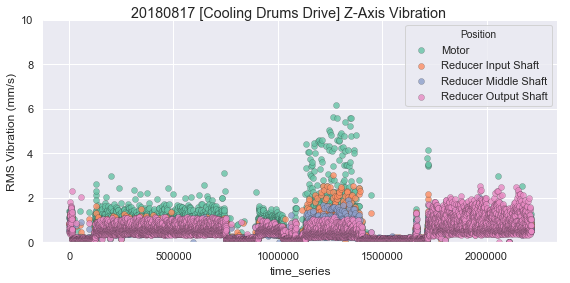

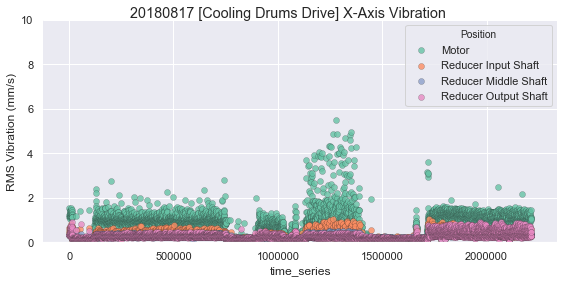

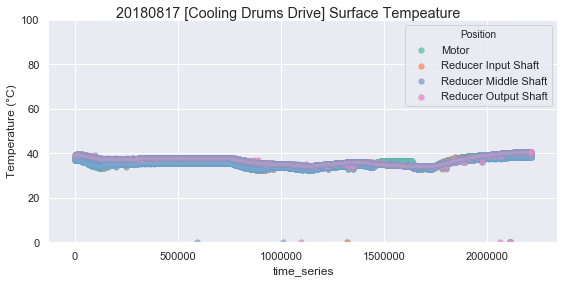

In [221]:

g1 = sns.lmplot(data=Zrms_df, x="time_series", y="History_Value", hue="Position", fit_reg=False,
                scatter_kws={'linewidths':.2,'edgecolor':'k'}, size=4, aspect=2, palette =sns.color_palette("Set2"),
                legend_out=False)
g1.set_ylabels("RMS Vibration (mm/s)")
g1.despine(left=True)
axes = g1.axes
axes[0,0].set_ylim(0,10)
g1.fig.suptitle(file_list[0][0:8] + " ["+  History_MachineName_array[0] + "] Z-Axis Vibration")

g2 = sns.lmplot(data=Xrms_df, x="time_series", y="History_Value", hue="Position", fit_reg=False,
                scatter_kws={'linewidths':.2,'edgecolor':'k'}, size=4, aspect=2, palette =sns.color_palette("Set2"),
                legend_out=False)
g2.set_ylabels("RMS Vibration (mm/s)")
g2.despine(left=True)
axes = g2.axes
axes[0,0].set_ylim(0,10)
g2.fig.suptitle(file_list[0][0:8] + " ["+  History_MachineName_array[0] + "] X-Axis Vibration")

g3 = sns.lmplot(data=Temp_df, x="time_series", y="History_Value", hue="Position", fit_reg=False,
                scatter_kws={'linewidths':.2,'edgecolor':'c'}, size=4, aspect=2, palette =sns.color_palette("Set2"),
                legend_out=False)
g3.set_ylabels("Temperature (°C)")
g3.despine(left=True)
axes = g3.axes
axes[0,0].set_ylim(0,100)
g3.fig.suptitle(file_list[0][0:8] + " ["+  History_MachineName_array[0] + "] Surface Tempeature")


saving_dir = "C:/Users/dwku/Desktop/plot"
g1.savefig(saving_dir)

In [217]:
# figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# figure.set_size_inches(18, 4)
# # ax1.scatter(data=Zrms_df, x="time_series", y="History_Value")


# plt.subplot(131)
# g1= sns.scatterplot(x="time_series", y="History_Value", hue="History_SensorName", style="History_SensorName", data=Zrms_df)

# plt.subplot(132)
# g2= sns.scatterplot(x="time_series", y="History_Value", hue="History_SensorName", style="History_SensorName", data=Xrms_df)

# plt.subplot(133)
# g3= sns.scatterplot(x="time_series", y="History_Value", hue="History_SensorName", style="History_SensorName",data=Temp_df)


# # Show the plot                   
# plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

#데이터 경로 설정
path_dir = "C:/Users/Administrator/Desktop/nexen_csv"
file_list = os.listdir(path_dir)
file_list.sort
file_list
len(file_list)
file_list

#그래프 스타일 설정
sns.set()

for j in range(0, len(file_list)):
    df_raw = pd.read_csv(path_dir + "/" + file_list[j], parse_dates=["History_TransTime"])

    df = df_raw
    print(df.shape)

    type(df[["History_SEQ"]])
    df["time_series"] = df.index.values
    df0 = df[["time_series", "History_TransTime", "History_AreaName", "History_MachineName", "History_SensorName", "History_ItemName", "History_Value"]]
    df0["Position"] = df0["History_SensorName"]


    History_MachineName_array = pd.pivot_table(data = df0, index = 'History_MachineName').index.values
    def make_folder(folder_name):
        if not os.path.isdir(folder_name):
            os.mkdir(folder_name)
    for location in range(0,len(History_MachineName_array)):
        saving_dir = "C:/Users/Administrator/Desktop/R_Cal/" + History_MachineName_array[location] 
        make_folder(saving_dir)


    for i in range(0,len(History_MachineName_array)):

        History_MachineName = df0[df0["History_MachineName"] == History_MachineName_array[i]]  


        History_MachineName["Sensor_ID"] =History_MachineName["History_ItemName"].str.split("]", n=1, expand=True)[0]
        History_MachineName["Sensor_ID"] =History_MachineName["Sensor_ID"].str.split("[", n=1, expand=True)[1]
        History_MachineName["History_ItemName_re"] =History_MachineName["History_ItemName"].str.split("]", n=1, expand=True)[1]
        History_MachineName[["History_ItemName", "Sensor_ID", "History_ItemName_re"]].head()

        History_ItemName_array = pd.pivot_table(data = History_MachineName, index = 'History_ItemName_re').index.values
        History_ItemName_array.sort()


        Temp_df =  History_MachineName[History_MachineName["History_ItemName_re"] ==History_ItemName_array[0]] 
        Xrms_df =  History_MachineName[History_MachineName["History_ItemName_re"] ==History_ItemName_array[2]] 
        Zrms_df =  History_MachineName[History_MachineName["History_ItemName_re"] ==History_ItemName_array[4]] 


        g1 = sns.lmplot(data=Zrms_df, x="time_series", y="History_Value", hue="Position", fit_reg=False,
                        scatter_kws={'linewidths':.2,'edgecolor':'k'}, height=8, aspect=2, palette =sns.color_palette("Set2"),
                        legend_out=False)
        g1.set_ylabels("RMS Vibration (mm/s)")
        g1.despine(left=True)
        axes = g1.axes
        axes[0,0].set_ylim(0,10)
        g1.fig.suptitle(file_list[j][0:8] + " ["+  History_MachineName_array[i] + "] Z-Axis Vibration")
        saving_dir_Z = "C:/Users/Administrator/Desktop/R_Cal/" + History_MachineName_array[i] + "/Z_axis/"
        make_folder(saving_dir_Z)
        saving_file_dir = saving_dir_Z + file_list[j][0:8]
        g1.savefig(saving_file_dir)


        g2 = sns.lmplot(data=Xrms_df, x="time_series", y="History_Value", hue="Position", fit_reg=False,
                        scatter_kws={'linewidths':.2,'edgecolor':'k'}, height=8, aspect=2, palette =sns.color_palette("Set2"),
                        legend_out=False)
        g2.set_ylabels("RMS Vibration (mm/s)")
        g2.despine(left=True)
        axes = g2.axes
        axes[0,0].set_ylim(0,10)
        g2.fig.suptitle(file_list[j][0:8] + " ["+  History_MachineName_array[i] + "] X-Axis Vibration")
        saving_dir_X = "C:/Users/Administrator/Desktop/R_Cal/" + History_MachineName_array[i] + "/X_axis/"
        make_folder(saving_dir_X)
        saving_file_dir = saving_dir_X + file_list[j][0:8]
        g2.savefig(saving_file_dir)



        g3 = sns.lmplot(data=Temp_df, x="time_series", y="History_Value", hue="Position", fit_reg=False,
                        scatter_kws={'linewidths':.2,'edgecolor':'c'}, height=8, aspect=2, palette =sns.color_palette("Set2"),
                        legend_out=False)
        g3.set_ylabels("Temperature (°C)")
        g3.despine(left=True)
        axes = g3.axes
        axes[0,0].set_ylim(0,100)
        g3.fig.suptitle(file_list[j][0:8] + " ["+  History_MachineName_array[i] + "] Surface Tempeature")
        saving_dir_Temp = "C:/Users/Administrator/Desktop/R_Cal/" + History_MachineName_array[i] + "/Temp/"
        make_folder(saving_dir_Temp)
        saving_file_dir = saving_dir_Temp + file_list[j][0:8]
        g3.savefig(saving_file_dir)


